In [1]:
! pip install nltk

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras.models import Sequential
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving music_speech_rock.zip to music_speech_rock.zip


In [ ]:
!unzip music_speech_rock.zip

Archive:  music_speech_rock.zip
   creating: music_speech_rock/
   creating: music_speech_rock/music_wav/
  inflating: music_speech_rock/music_wav/bagpipe.wav  
  inflating: music_speech_rock/music_wav/ballad.wav  
  inflating: music_speech_rock/music_wav/bartok.wav  
  inflating: music_speech_rock/music_wav/beat.wav  
  inflating: music_speech_rock/music_wav/beatles.wav  
  inflating: music_speech_rock/music_wav/bigband.wav  
  inflating: music_speech_rock/music_wav/birdland.wav  
  inflating: music_speech_rock/music_wav/blues.wav  
  inflating: music_speech_rock/music_wav/bmarsalis.wav  
  inflating: music_speech_rock/music_wav/brahms.wav  
  inflating: music_speech_rock/music_wav/canonaki.wav  
  inflating: music_speech_rock/music_wav/caravan.wav  
  inflating: music_speech_rock/music_wav/chaka.wav  
  inflating: music_speech_rock/music_wav/classical.wav  
  inflating: music_speech_rock/music_wav/classical1.wav  
  inflating: music_speech_rock/music_wav/classical2.wav  
  inflating:

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('dataset.csv', 'w', newline='') 
with file:
    writer = csv.writer(file)
    writer.writerow(header)


In [ ]:
music_speech_rock = 'music_wav rock_wav speech_wav'.split()
for g in music_speech_rock:
    for filename in os.listdir(f'music_speech_rock/{g}'):
        songname = f'music_speech_rock/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,glass1.wav,0.349381,0.104271,1716.182485,2050.139474,3633.786360,0.053938,-158.884710,122.570776,6.925426,30.715715,-10.562345,19.166751,-8.640233,5.119318,-2.989934,-0.752851,-3.353304,-3.223295,-4.027309,-0.812737,-3.502693,-3.634970,-9.043222,-6.184789,-7.281432,-5.314539,music_wav
1,corea.wav,0.231716,0.062519,836.277172,1375.385661,1214.292657,0.036172,-336.051495,166.330458,32.537465,20.948674,-2.644922,-8.193910,-7.111234,0.662799,-9.920304,-4.899292,-9.795736,-4.208198,-10.875570,-5.466197,-4.308042,-8.736302,-5.987026,-0.082301,-2.762866,-2.723216,music_wav
2,vlobos.wav,0.229955,0.075255,1235.846277,1296.885794,2216.394931,0.083480,-223.540719,166.325323,-41.890631,22.397270,-9.348382,-8.407625,-2.687705,-2.501228,-1.878211,-3.622713,-14.448072,-7.843381,-4.117205,0.984189,-2.714123,-1.750508,-1.994313,-2.171288,-6.257275,-6.101675,music_wav
3,bigband.wav,0.331227,0.050956,2255.135629,2060.164333,3953.659426,0.128035,-192.916900,89.265224,-50.373131,26.026583,8.227527,-17.603376,-10.883679,-7.903281,-16.696348,-0.371892,-8.664092,2.540246,0.793859,5.586035,9.943990,10.374258,8.609345,11.490908,9.776296,1.299783,music_wav
4,deedee.wav,0.361412,0.082270,1778.619278,2275.146611,3851.576710,0.067704,-206.452801,107.792672,10.662753,29.604194,7.357556,15.894842,4.293085,3.335714,8.624440,4.183947,1.298320,2.016503,-3.623628,0.785897,-1.987620,4.205584,6.468713,8.428010,0.682934,-0.558541,music_wav


In [ ]:
data1 = data.drop(['filename'],axis=1)#Encoding the Labels
audio_list = data1.iloc[:, -1]

encoder = LabelEncoder()

y = encoder.fit_transform(audio_list)#Scaling the Feature columns
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data1.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [ ]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               13824     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 186,499
Trainable params: 186,499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16,validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
9/9 [==============================] - 0s 15ms/step - loss: 0.8543 - accuracy: 0.6736 - val_loss: 0.5472 - val_accuracy: 0.8750
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3820 - accuracy: 0.8889 - val_loss: 0.4403 - val_accuracy: 0.8542
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2199 - accuracy: 0.9306 - val_loss: 0.2788 - val_accuracy: 0.9375
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9722 - val_loss: 0.4213 - val_accuracy: 0.8750
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0664 - accuracy: 0.9861 - val_loss: 0.5531 - val_accuracy: 0.8542
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0492 - accuracy: 0.9931 - val_loss: 0.3937 - val_accuracy: 0.8542
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.4106 - val_accuracy: 0.9167
Epoch 8/50
9/9 [=================

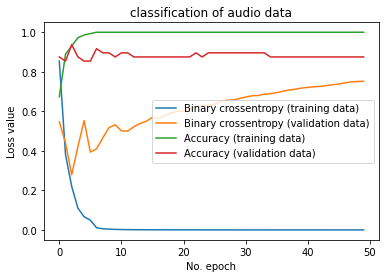

In [ ]:
plt.plot(history.history['loss'], label='Binary crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Binary crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('classification of audio data')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="center right")
plt.show()